In [15]:
from sympy.abc import t, x, y
from sympy import simplify
from math import sqrt, pow
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt


def exterior_penalty_function(constraints):
    penalty_function = ((constraints[0]+abs(constraints[0]))**2+(constraints[1]+abs(constraints[1]))**2)/2
    return simplify(penalty_function)


def check_in_d_direction(f, y0, delta, d):
    y1 = []

    if f.evalf(8, subs={x: y0[0], y: y0[1]}) > f.evalf(8, subs={x: y0[0] + delta * d[0], y: y0[1] + delta * d[1]}):
        y1 = [y0[0] + delta * d[0], y0[1] + delta * d[1]]
        # print("smer: plus, y=", y1, " f=", f.evalf(7, subs={x: y1[0], y: y1[1]}))
    elif f.evalf(8, subs={x: y0[0], y: y0[1]}) > f.evalf(8, subs={x: y0[0] - delta * d[0], y: y0[1] - delta * d[1]}):
        y1 = [y0[0] - delta * d[0], y0[1] - delta * d[1]]
        # print("smer: minus, y=", y1, " f=", f.evalf(7, subs={x: y1[0], y: y1[1]}))
    else:
        y1 = y0
    return y1


def hooke_jeeves(f, x0, delta, epsilon, d):
    br_iter = 0
    max_iter = 50
    while delta >= epsilon and br_iter < max_iter:
        br_iter = br_iter + 1

        #print("Iteracija broj: ", br_iter)
        y0 = x0
        y1 = y0
        for i in range(len(x0)):
            y1 = check_in_d_direction(f, y0, delta, d[i])
            y0 = y1
        #print("Nova bazisna tacka x:", y1, "f=", f.evalf(7, subs={x: y1[0], y: y1[1]}), "delta=",delta)
        xxp = [y1[0] + (y1[0] - x0[0]), y1[1] + (y1[1] - x0[1])]
        if f.evalf(8, subs={x: y1[0], y: y1[1]}) > f.evalf(8, subs={x: xxp[0], y: xxp[1]}):
            y1 = xxp
            #print("\t Po obrascu: y=",y1," f=", f.evalf(7, subs={x: y1[0], y: y1[1]}))
        else:
            delta = delta * pow(10, -1)
            #print("\t Po obrascu: y=",xxp," f=", f.evalf(7, subs={x: xxp[0], y: xxp[1]}))
            #print("Povratak u staru bazisnu tacku sa manjim korakom")
        x0 = y1

    return x0


def exterior_penalty_minimization(f, constraints,x0, epsilon):
    penalty = exterior_penalty_function(constraints)
    ff = f + t * penalty
    print("Problem: min f(x,y), f(x,y) =",f)
    print("Ogranicenja: g1(x,y) =",constraints[0],"<= 0, g2(x,y) =", constraints[1],"<= 0")
    print("Pomocna funckija sa kaznom: F(x,y) =",ff)
    print("Kazneni parametar t se u svakoj iteraciji povecava 10 puta")
    t_value = 1
    max_iter = 50
    br_iter = 0
    difference = epsilon
    d = [[1, 0], [0, 1]]
    delta = 1
    points = []
    points.append(x0)
    while difference >= epsilon and br_iter <= max_iter:
        br_iter = br_iter + 1
        x1 = hooke_jeeves(ff.subs(t,t_value), x0, delta, epsilon, d)
        difference = sqrt(pow(x1[0]-x0[0],2) + pow(x1[1]-x0[1], 2))
        print("Iteracija: ", br_iter, end=", ")
        print("f=",f.evalf(9,subs={x:x1[0],y:x1[1]}), end=", ")
        print("{x,y}={",x1[0],",",x1[1],"}, t=", t_value)
        print("odstupanje=", difference,end=", ")
        print("vrednosti ogranicenja: {g1,g2}={",constraints[0].evalf(8,subs={x:x1[0],y:x1[1]}),end=",")
        print(constraints[1].evalf(8,subs={x:x1[0], y:x1[1]}),"}")
        t_value = t_value * 10
        x0 = x1
        points.append(x0)

    xmin = x0
    print("Resenje: f=",f.evalf(8,subs={x:xmin[0],y:xmin[1]}))
    print("Za {x,y}={",xmin[0],",",xmin[1],"}")

    return points


def plot_results(points):
    start = points[0]
    X = np.arange(-abs(start[0])-1, abs(start[0])+1, 0.01)
    Y = np.arange(-abs(start[1])-1, abs(start[0])+1, 0.01)
    X, Y = np.meshgrid(X, Y)
    Z = (X - 1) ** 2 + (Y + 2) ** 4

    fig, ax = plt.subplots(1, 1)
    cp = plt.contourf(X, Y, Z, levels=20, cmap=cm.cividis)
    fig.colorbar(cp)

    G1 = (X + 1) ** 2 + 2 * (Y + 3) ** 2 - 3
    G2 = Y ** 2 + 5 * X - 6

    level = 0
    color = 'red'
    plt.contour(X, Y, G1, levels=[level], colors=color)
    plt.contour(X, Y, G2, levels=[level], colors=color)

    x_array = []
    y_array = []
    for point in points:
        x_array.append(point[0])
        y_array.append(point[1])

    x = np.array(x_array)
    y = np.array(y_array)
    plt.plot(x, y, '.:y')
    plt.show()


if __name__ == '__main__':

    #definisanje ciljne funkcije i ogranicenja
    f = "(x-1)**2+(y+2)**4"
    g = [simplify("(x+1)**2+2*(y+3)**2-3"),simplify("y**2+5*x-6")]
    
    #definisanje tacnosti i pocetne tacke
    epsilon = 0.00000001
    x0 = [7, 4]



In [16]:
points = exterior_penalty_minimization(simplify(f), g, x0, epsilon)

Problem: min f(x,y), f(x,y) = (x - 1)**2 + (y + 2)**4
Ogranicenja: g1(x,y) = (x + 1)**2 + 2*(y + 3)**2 - 3 <= 0, g2(x,y) = 5*x + y**2 - 6 <= 0
Pomocna funckija sa kaznom: F(x,y) = t*((5*x + y**2 + Abs(5*x + y**2 - 6) - 6)**2/2 + ((x + 1)**2 + 2*(y + 3)**2 + Abs((x + 1)**2 + 2*(y + 3)**2 - 3) - 3)**2/2) + (x - 1)**2 + (y + 2)**4
Kazneni parametar t se u svakoj iteraciji povecava 10 puta
Iteracija:  1, f= 0.521353107, {x,y}={ 0.2783700000000001 , -2.156720000000001 }, t= 1
odstupanje= 9.115125397672816, vrednosti ogranicenja: {g1,g2}={ 0.056472174,0.043291158 }
Iteracija:  2, f= 0.539751870, {x,y}={ 0.2657939999999997 , -2.162273999999998 }, t= 10
odstupanje= 0.013747824991611462, vrednosti ogranicenja: {g1,g2}={ 0.0058041526,0.0043988511 }
Iteracija:  3, f= 0.541665124, {x,y}={ 0.26449899999999976 , -2.162854999999997 }, t= 100
odstupanje= 0.0014193611238859309, vrednosti ogranicenja: {g1,g2}={ 0.00058122305,0.00043675103 }
Iteracija:  4, f= 0.541856355, {x,y}={ 0.2643696999999999 , -2.

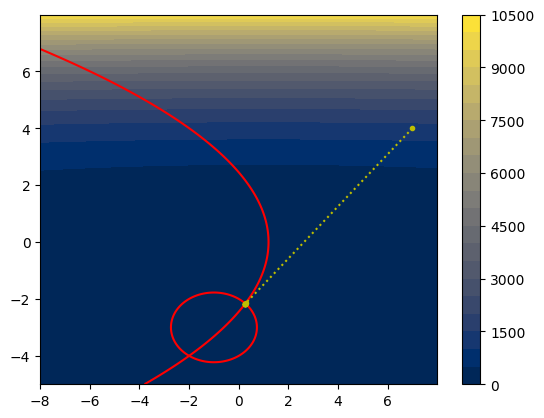

In [17]:
plot_results(points)